# Extension du Mini Projet Introduction au Deep Learning (Perceptron)
# Alexis Araujo

## Première Partie

In [26]:
from PIL import Image
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
#!pip install h5py
#from utilities import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import h5py
import glob
# import cv2

## Importation du dataSet

In [27]:
dataset_train = "datasets/train_set.hdf5"
dataset_test = "datasets/test_set.hdf5"

#on load le dataset d'entrainement
dataset = h5py.File(dataset_train, "r")

x_train = np.array(dataset["X"][:])
y_train = np.array(dataset["y"][:])

#on load le dataset de test
dataset = h5py.File(dataset_test, "r")

x_test = np.array(dataset["X"][:])
y_test = np.array(dataset["y"][:])

In [28]:
#x_train, x_test, y_train, y_test  = load_data_train()

In [29]:
# Afficher les dimensions des données d'entrainement et des étiquettes
print(x_train.shape)
y_train = y_train.reshape(y_train.shape[0], 1)
print(y_train.shape)
# Utilisation de np.unique avec return_counts=True pour obtenir les valeurs uniques et leurs occurrences dans y_train
print(np.unique(y_train, return_counts=True))
#print(y_train == 0, y_train == 1)

(2840, 64, 64)
(2840, 1)
(array([0, 1]), array([1420, 1420], dtype=int64))


In [30]:
# Affiche les dimensions des données de test et des étiquettes
print(x_test.shape)
y_test = y_test.reshape(y_test.shape[0], 1)
print(y_test.shape)
# Utilisation de np.unique avec return_counts=True pour obtenir les valeurs uniques et leurs occurrences dans y_test
print(np.unique(y_test, return_counts=True))
#print(y_test == 0, y_test == 1)

(708, 64, 64)
(708, 1)
(array([0, 1]), array([354, 354], dtype=int64))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


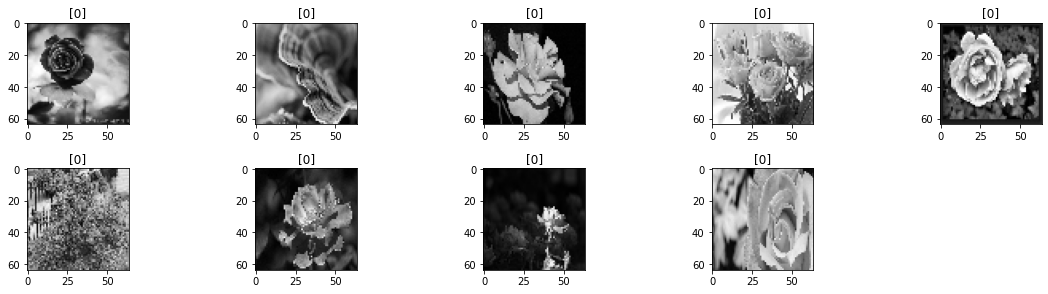

In [31]:
# Création d'une figure
plt.figure(figsize=(16,8))

# Une boucle sur les 9 premières images et leurs étiquettes pour les afficher
for i in range(1,10):
    plt.subplot(4,5,i) # sous graphique
    plt.imshow(x_train[i],cmap='gray')     # Affiche l'image (x_train[i])
    plt.title(y_train[i])   # Ajoute le titre du sous graphique en affichant les étiquettes
    plt.tight_layout() # Ajustement
plt.show()

In [32]:
# Réorganise les données d'entrainement x_train pour qu'elles soient de forme (nombre d'échantillons, -1)
# et divise toutes les valeurs par la valeur maximale de x_train pour normaliser les données.
x_train_reshape=x_train.reshape(x_train.shape[0],-1)/x_train.max()

In [33]:
# Affiche la dimension des données d'entraînement x_train_reshape après la transformation et la normalisation.
print(x_train_reshape.shape)

(2840, 4096)


In [34]:
# Calcule la valeur maximale dans les données d'entrainement x_train_reshape après la transformation et la normalisation.
x_train_reshape.max()

1.0

In [35]:
# Réorganise les données d'entrainement x_test pour qu'elles soient de forme (nombre d'échantillons, -1)
# et divise toutes les valeurs par la valeur maximale de x_train pour normaliser les données.
x_test_reshape=x_test.reshape(x_test.shape[0],-1)/x_train.max()

In [36]:
# Affiche la dimension des données d'entraînement x_test_reshape après la transformation et la normalisation.
print(x_test_reshape.shape)

(708, 4096)


In [37]:
# Calcule la valeur maximale dans les données d'entrainement x_test_reshape après la transformation et la normalisation.
x_test_reshape.max()

1.0

In [38]:
# Initialisation des paramètres du modèle
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W, b)

In [39]:
#Calcule la sortie d'un modèle basé sur une combinaison linéaire des caractéristiques d'entrée X avec des poids W et un biais b, suivi de l'application de la fonction sigmoïde.
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [40]:
# Régression logisitique
# Calcul du coût (la perte)
def logLoss(A,y):  # Ai est la probabilité prédite par le modèle pour i
    epsilon=1e-15
    return 1/len(y)*np.sum(-y*np.log(A+epsilon)-(1-y)*np.log(1-A+epsilon))

In [41]:
# Gradients
# Calcul les gradients de la perte par rapport aux paramètres ( poids et vecteur)
def gradients (A,X,y):
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*sum(A-y)
    return (dW,db)

In [42]:
# Mettre à jour les paramètres (poids et vecteur) en utilisant les gradients utilisés
def update(dW,db, W, b, learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [43]:
# Faire les prédictions à l'aide d'un modèle Rlogi
def prediction(X,W,b):
    A=model(X,W,b)
    #print(A)
    return A>=0.5

In [44]:
# Entraîne un modèle de régression logistique (neurone artificiel) en utilisant la descente de gradient stochastique.
def artificialNeuron(x_train,y_train,x_test,y_test, learning_rate=0.01, n_iter=15000):
    #initialisation
    W,b=initialisation(x_train)
    train_cout=[]
    train_accuracy=[]
    test_cout=[]
    test_accuracy=[]
    cout=[]
    accuracy=[]
    for i in tqdm(range(n_iter)):
        # activation
        A=model(x_train,W,b)
        if i%10==0:
        #train cout/accuracy
            train_cout.append(logLoss(A,y_train))
            #precision
            y_pred=prediction(x_train,W,b)
            train_accuracy.append(accuracy_score(y_train,y_pred))
        #test cout/accuracy
            A_test=model(x_test, W,b)
            test_cout.append(logLoss(A_test,y_test))
            #precision
            y_pred=prediction(x_test,W,b)
            test_accuracy.append(accuracy_score(y_test,y_pred))
        #mise à jour
        dW,db=gradients(A,x_train,y_train)
        W,b= update(dW,db,W,b,learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_cout, label='train_cout')
    plt.plot(test_cout, label='test_cout')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(test_accuracy, label='test_accuracy')
    plt.legend()
    plt.show()
    return (W,b)

100%|██████████| 15000/15000 [04:15<00:00, 58.68it/s]


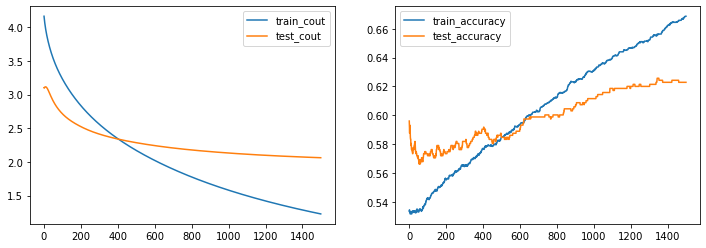

In [45]:
# Appel de la fonction et affichage des courbes de coût et d'exactitude pour l'entraînement et le test
W,b=artificialNeuron(x_train_reshape,y_train,x_test_reshape, y_test)

Voir si l'image est une tulipe ou une rose

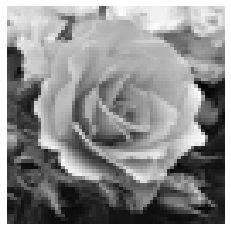

Rose [[0.99999754]]


In [50]:
def predict_single_image(image_path, W, b, image_size=(64, 64)):
    img = Image.open(image_path)
    img = img.convert('L')  # Convertir en niveaux de gris si ce n'est pas déjà fait
    img = img.resize(image_size)
    img_array = np.array(img).reshape(1, -1) / 255.0

    prediction = model(img_array, W, b)

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    if prediction >= 0.5:
        print("Rose", prediction)
    else:
        print("Tulipe", prediction)

# Utilisation de la fonction pour prédire une image
image_path_to_predict = 'donnees_basique/rose3.jpg'
predict_single_image(image_path_to_predict, W, b)

Matrice de confusion non normalisée
[[235 119]
 [148 206]]
              precision    recall  f1-score   support

       roses       0.61      0.66      0.64       354
     tulipes       0.63      0.58      0.61       354

    accuracy                           0.62       708
   macro avg       0.62      0.62      0.62       708
weighted avg       0.62      0.62      0.62       708



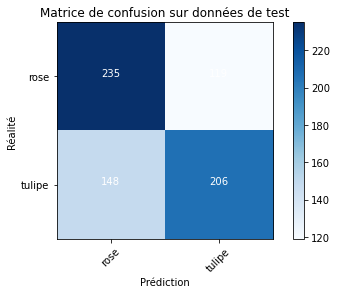

In [47]:
#Création de la matrice de confusion

from sklearn.metrics import confusion_matrix
import itertools
y_pred=prediction(x_test_reshape,W,b)
cm=confusion_matrix(y_test,y_pred)
cm_plot_labels=['rose','tulipe']
def plot_confusion_matrix(cm,classes,normalize=False,title='Matrice de confusion',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Matrice de confusion normalisée")
  else:
    print("Matrice de confusion non normalisée")

  print(cm)
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
              horizontalalignment="center",
              color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Réalité')
  plt.xlabel('Prédiction')
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Matrice de confusion sur données de test')

#Création du rapport de classification

from sklearn.metrics import classification_report
target_names=['roses','tulipes']
print(classification_report(y_test,y_pred,target_names=target_names))